# [E-06] 프로젝트 : 멋진 작사가 만들기

<br>

---

In [154]:
import glob
import tensorflow

print(tensorflow.__version__)

2.6.0


### ✔️ 필요한 라이브러리 import하기

---

In [155]:
import warnings
warnings.filterwarnings("ignore")

import glob

import os
import re 
import numpy as np
import tensorflow as tf




import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

---
### ✔️ 데이터 읽어오기

---

- `glob` 모듈을 사용하면 파일을 읽어오는 작업을 하기가 유용하다.<br>
- `glob`를 활용하여 모든 `txt` 파일을 읽어온 후, `raw_corpus` 리스트에 문장 단위로 저장한다.<br>

In [156]:
txt_file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

In [157]:
len(txt_list)

49

In [158]:
txt_list

['/aiffel/aiffel/lyricist/data/lyrics/janisjoplin.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/nursery_rhymes.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dickinson.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/nicki-minaj.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/disney.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/bob-marley.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/beatles.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/dj-khaled.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/kanye.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/patti-smith.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/drake.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/r-kelly.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/rihanna.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/cake.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/bruno-mars.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/leonard-cohen.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/ludacris.txt',
 '/aiffel/aiffel/lyricist/data/lyrics/kanye-west.txt',
 '/aiffel/aiffel/lyricist/data/ly

<br>

- `txt_file_path`에 있는 모든 `txt` 파일을 읽어서 raw_corpus에 담아보자!<br><br>
- 우선, `txt`파일 목록을 한번 살펴보고 몇개의 파일이 있는지 확인해보자!<br><br>

In [159]:
txt_list[0].find('lyrics')

29

In [160]:
# txt_list = !ls /aiffel/aiffel/lyricist/data/lyrics/*
print(f'txt파일의 갯수 : {len(txt_list)}')
print('\n====================\n'); 
for idx, txt_name in enumerate(txt_list):
    print(idx, ':', txt_name[36:])

txt파일의 갯수 : 49


0 : janisjoplin.txt
1 : nursery_rhymes.txt
2 : dickinson.txt
3 : nicki-minaj.txt
4 : disney.txt
5 : bob-marley.txt
6 : beatles.txt
7 : dj-khaled.txt
8 : kanye.txt
9 : patti-smith.txt
10 : drake.txt
11 : r-kelly.txt
12 : rihanna.txt
13 : cake.txt
14 : bruno-mars.txt
15 : leonard-cohen.txt
16 : ludacris.txt
17 : kanye-west.txt
18 : eminem.txt
19 : radiohead.txt
20 : lorde.txt
21 : notorious-big.txt
22 : prince.txt
23 : paul-simon.txt
24 : bieber.txt
25 : lin-manuel-miranda.txt
26 : Kanye_West.txt
27 : joni-mitchell.txt
28 : alicia-keys.txt
29 : nirvana.txt
30 : johnny-cash.txt
31 : missy-elliott.txt
32 : bruce-springsteen.txt
33 : jimi-hendrix.txt
34 : bob-dylan.txt
35 : bjork.txt
36 : dolly-parton.txt
37 : blink-182.txt
38 : michael-jackson.txt
39 : britney-spears.txt
40 : al-green.txt
41 : Lil_Wayne.txt
42 : lil-wayne.txt
43 : dr-seuss.txt
44 : notorious_big.txt
45 : lady-gaga.txt
46 : nickelback.txt
47 : amy-winehouse.txt
48 : adele.txt


△ 유명한 가수들은 유명곡들을 담은 텍스트 파일들이 나열된 것을 확인할 수 있다.<br>자, 그럼 이제 모든 `txt` 파일을 읽어서 raw_corpus에 모든 가사를 담아보자<br><br>

In [161]:
# 여러개의 txt 파일을 모두 읽어서 raw_corpus에 담는다.

raw_corpus = []

for txt_file in txt_list:
    with open(txt_file, 'r') as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print('데이터의 크기:', len(raw_corpus))
print('Examples:\n', raw_corpus[:3])

데이터의 크기: 187088
Examples:
 ["Busted flat in Baton Rouge, waitin' for a train", "And I's feelin' near as faded as my jeans", 'Bobby thumbed a diesel down, just before it rained']


---
### ✔️ 데이터 정제

---

- `raw_corpus` 변수에 187088개의 문장이 담겨있는데, 각 문장들을 살펴보자.<br><br>
- 모든 문장을 살펴볼 수는 없으니까 10개의 문장을 보고 필터링을 해야할 단어들이 있는지 파악해본다.<br><br>

In [162]:
raw_corpus[:10]

["Busted flat in Baton Rouge, waitin' for a train",
 "And I's feelin' near as faded as my jeans",
 'Bobby thumbed a diesel down, just before it rained',
 'It rode us all the way to New Orleans I pulled my harpoon out of my dirty red bandanna',
 "I was playin' soft while Bobby sang the blues, yeah",
 "Windshield wipers slappin' time, I was holdin' Bobby's hand in mine",
 "We sang every song that driver knew Freedom's just another word for nothin' left to lose",
 "Nothin', don't mean nothin' hon' if it ain't free, no no",
 "And, feelin' good was easy, Lord, when he sang the blues",
 "You know, feelin' good was good enough for me"]

<br>△ 위 문장들을 확인해보니, 필터링이 필요한 단어들은 없는 것 같지만 공백문장이 있을 수 있으니 한번 확인해보기로 한다.<br><br>

In [163]:
cnt = 0

for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: 
        cnt += 1

if cnt != 0:
    print('공백문장이 {}개 있습니다.'.format(cnt))
else:
    print('공백문장 없음.')

공백문장이 11102개 있습니다.


<br>

- 공백을 가지는 문장이 11102개 있으므로 해당 데이터들의 필터링이 필요하다.<br><br>

#### 앞선 노드에서 `preprocess_sentence()`라는 정제함수를 만들었다.<br><br>이 함수는 입력된 문장을 아래와 같은 방법으로 filtering 한다.<br>

- 1) 소문자로 바꾸고, 양쪽 공백을 지운다.
- 2) 특수문자 양쪽에 공백을 넣고
- 3) 여러개의 공백은 하나의 공백으로 바꾼다
- 4) a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꾼다.
- 5) 다시 양쪽 공백을 지운다.
- 6) 문장 시작에는 <strart>, 끝에는 <end>를 추가한다.<br><br>

In [164]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', ' ', sentence)  #3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>'  #6
    return sentence

<br>자연어처리 분야에서 모델의 입력이 되는 문장을 *`소스문장(Source Sentence)`*, <br>정답 역할을 하게 될 모델의 출력 문장을 *`타겟문장(Target Sentence)`*라고 관례적으로 부른다.<br> 각각 X_train, y_train에 해당한다고 볼 수 있다.<br><br>
위에서 만든 정제 함수를 통해 만든 데이터셋에서 토큰화를 진행한 후 <U>끝 단어 `<end>`를 없애면 `소스문장`</U>, <U>첫 단어 `<start>`를 없애면 `타겟 문장`</U>이 된다.<br><br>

In [165]:
# 여기에 정제된 문장을 모아보자.
corpus = []

for sentence in raw_corpus:
    # 우리가 원하지 않는 문장은 건너뛴다.
    if (len(sentence) == 0): continue
    if sentence[-1] == ":": continue
    
    # 정제를 하고 담아보자
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
# 정제된 결과를 10개만 확인해보자.

print('정제된 후 문장의 갯수는 {}개이다.'.format(len(corpus)))
print()
print(corpus[:10])

정제된 후 문장의 갯수는 175749개이다.

['<start> busted flat in baton rouge , waitin for a train <end>', '<start> and i s feelin near as faded as my jeans <end>', '<start> bobby thumbed a diesel down , just before it rained <end>', '<start> it rode us all the way to new orleans i pulled my harpoon out of my dirty red bandanna <end>', '<start> i was playin soft while bobby sang the blues , yeah <end>', '<start> windshield wipers slappin time , i was holdin bobby s hand in mine <end>', '<start> we sang every song that driver knew freedom s just another word for nothin left to lose <end>', '<start> nothin , don t mean nothin hon if it ain t free , no no <end>', '<start> and , feelin good was easy , lord , when he sang the blues <end>', '<start> you know , feelin good was good enough for me <end>']


데이터는 이제 완전하게 준비가 되었다.<br>우리가 가르칠 언어(data)를 인공지능의 모국어인 숫자로 변환해보자<br><br>텐서플로우는 자연어 처리를 위한 여러가지 모듈을 제공하는데 `tf.keras.preprocessing.text.Tokenizer` 패키지는 <U>1) 정제된 데이터를 토큰화</U>하고,<br><U>2) 단어사전(vocabulary 또는 dictionary라고 칭함)을 만들</U>어주며, <U>3) 데이터를 숫자로 변환</U>까지 한방에 해준다.<br><br>이 과정을 **벡터화(vectorize)**라고 하며, 숫자로 변환된 데이터를 **텐서(tensor)**라고 칭한다.<br><br>

또한, 이번 프로젝트에서 처리해야할 중요한 부분이 있다.<br><br>작사 중 지나치게 긴 문장들이 존재하는데, 이러한 문장들은 다른 데이터들이 과도한 padding을 갖게하므로 제거한다.<br>왜냐하면 너무 긴 문장은 노래 가사를 작사하기에 어울리지 않기 때문이다.<br><br>따라서 **토큰화 했을 때 토큰의 갯수가 15개를 넘어가는 문장은 학습데이터에서 제외**하기로 한다.

In [166]:
# 토큰화 할 때 텐서플로우의 Tokenizer와 pad_sequences를 사용합니다
# 더 잘 알기 위해 아래 문서들을 참고하면 좋습니다
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def tokenize(corpus):
    # 7000단어를 기억할 수 있는 tokenizer를 만들겁니다
    # 우리는 이미 문장을 정제했으니 filters가 필요없어요
    # 7000단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, 
        filters=' ',
        oov_token="<unk>"
    )
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    tensor_filt = [] # 토큰의 갯수가 14개 이하인 문장만 담기위해
    
    for i in range(len(tensor)):
        if len(tensor[i]) <= 15:
            tensor_filt.append(tensor[i])
        
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor_filt = tf.keras.preprocessing.sequence.pad_sequences(tensor_filt, padding='post')  
    
    print(tensor_filt,tokenizer)
    return tensor_filt, tokenizer

tensor_filt, tokenizer = tokenize(corpus)

[[   2 3604 1691 ...    0    0    0]
 [   2    8    5 ...    0    0    0]
 [   2  804 7655 ...    0    0    0]
 ...
 [   2   20   20 ...    3    0    0]
 [   2   20 4178 ...    0    0    0]
 [   2    3    0 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f50113956d0>


#### 새롭게 정제된 문장을 보게되면 (156013, 15)개의 크기를 갖는것을 확인한다.

In [168]:
print(tensor_filt.shape)

(156013, 15)


In [169]:
# 생성된 텐서 데이터를 3번째 행, 10번째 열까지만 출력해 보자

print(tensor_filt[:10, :10])

[[   2 3604 1691   14 7050 3995    4 1100   28    9]
 [   2    8    5   16  512  848   81 2584   81   13]
 [   2  804 7655    9 6042   60    4   35  185   11]
 [   2    5   57  873  962  234  804 1731    6  927]
 [   2 5629 7656 4179   73    4    5   57 1162  804]
 [   2    7   34    4  512  108   57  108  264   28]
 [   2   65  804 3390    6 1898   19   13  325    3]
 [   2  132   24 2963   19 1676    4  132  183   23]
 [   2   55   16  469   28   17  159    4    8    5]
 [   2  484    4   17   16   24   17  804  244   12]]


<br>텐서 데이터는 모두 정수로 이루어져 있으며 이 숫자는 tokenizer에 구축된 단어사전의 인덱스이다.<br><br>

- `tokenizer.index_word` : 말뭉치(corpus)를 토큰화 시킨 후 단어사전(dictionary 객체)
- `tokenizer.num_words` :  토큰화된 단어의 갯수

In [170]:
# 단어사전이 어떻게 구축되어 있는지 살펴보면...

for idx in tokenizer.index_word:
    print(idx, ':', tokenizer.index_word[idx])
    
    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : i
6 : the
7 : you
8 : and
9 : a
10 : to


In [171]:
# 토큰화된 단어의 갯수

tokenizer.num_words

12000

<br>이제 생성된 텐서를 소스와 타겟으로 분리하여 모델이 학습할 수 있도록 한다.<br><br>텐서 출력부에서 행 뒤쪽에 0이 많이 나온 부분은 정해진 입력 시쿼스 길이보다 문장이 짧을 경우 0으로 패딩(padding)을 채워 넣은 것이다.<br><br>사전에는 없지만 0은 바로 패딩 문자 `<pad>`가 된다.

In [173]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor_filt[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor_filt[:, 1:]    

print(src_input.shape)
print(tgt_input.shape)

print(src_input[0])
print(tgt_input[0])

(156013, 14)
(156013, 14)
[   2 3604 1691   14 7050 3995    4 1100   28    9  681    3    0    0]
[3604 1691   14 7050 3995    4 1100   28    9  681    3    0    0    0]


---
### ✔️ 평가 데이터셋 분리

---

In [174]:
from sklearn.model_selection import train_test_split

In [179]:
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size=0.2, random_state=2022)

print('Source Train :', enc_train.shape)
print('Target Train :', dec_train.shape)
print('Source Val :', enc_val.shape)
print('Target Val :', dec_val.shape)

Source Train : (124810, 14)
Target Train : (124810, 14)
Source Val : (31203, 14)
Target Val : (31203, 14)


In [181]:
BUFFER_SIZE = len(enc_train)
BATCH_SIZE = 256
# steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 12000개와, 여기 포함되지 않은 0:<pad>를 포함하여 12001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

In [182]:
BUFFER_SIZE = len(enc_val)
BATCH_SIZE = 256
# steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 12000개와, 여기 포함되지 않은 0:<pad>를 포함하여 12001개
VOCAB_SIZE = tokenizer.num_words + 1   

val_dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train))
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)
val_dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

#### 이번 스텝에서 데이터셋을 생성하기 위해 거쳐 온 과정을 기억해두자. == `데이터 전처리`

- 정규 표현식을 사용해서 corpus 생성
- `tf.keras.preprocessing.text.Tokenizer`를 이용해 corpus를 텐서로 변환
- `tf.data.Dataset.from_tensor_slices()`를 이용해 corpus 텐서를 `tf.data.Dataset` 객체로 변환

---
### ✔️ 인공지능 학습시키기

---

<img src = 'https://user-images.githubusercontent.com/103712369/168005994-ca087f67-4703-4b3e-b9b0-efc083c326da.png' width ='500' height='50'/><br>

<br>우리가 만들 모델은 tf.keras.Model을 Subclassing 하는 방식으로 만든다.<br>우리 모델에는 1개의 Embedding 레이어, 2개의 LSTM 레이어, 1개의 Dense 레이어로 구성됨.


In [184]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [185]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break  # take:: 배치를 불러오는 것.

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 2.13503354e-05, -2.90875760e-05, -8.46181138e-05, ...,
         -1.06970023e-04,  3.14476260e-04, -1.20200355e-04],
        [ 9.91899506e-05, -5.09362617e-05, -5.43419537e-06, ...,
         -4.57951770e-04,  4.26878454e-04, -2.23781506e-04],
        [ 2.73446843e-04,  2.44476425e-04,  1.20835204e-04, ...,
         -3.80774873e-04,  6.46780769e-04, -1.19340577e-04],
        ...,
        [-9.48117289e-04, -7.44814111e-04,  4.66682512e-04, ...,
         -1.29898428e-03,  9.94084985e-04,  1.18531566e-03],
        [-1.12291728e-03, -6.52765681e-04,  8.58927146e-04, ...,
         -1.49747427e-03,  9.06364701e-04,  1.43014232e-03],
        [-1.22591155e-03, -5.58944710e-04,  1.21500809e-03, ...,
         -1.71311561e-03,  7.89864978e-04,  1.63720280e-03]],

       [[ 2.13503354e-05, -2.90875760e-05, -8.46181138e-05, ...,
         -1.06970023e-04,  3.14476260e-04, -1.20200355e-04],
        [-2.74841237e-04,  2.85097985e-06, -1

- 모델의 최종 출력 텐서 shape를 유심히 보면 `shape=(256, 14, 12001)`임을 알 수 있다.<br>
- 12001은 Dense 레이어의 출력 차원수.<br>
- 12001개 단어 중 어느 단어의 확률이 가장 높을지를 모델링해야 함.<br><br>

##### 256은 이전 스텝에서 지정한 배치사이즈. `dataset.take(1)`를 통해서 1개의 배치, 즉 256개의 문장 데이터를 가져온다.<br><br>
##### 14은 `tf.keras.layers.LSTM(hidden_size, return_sequences=True)`로 호출한 LSTM 레이어에서 return~=True로 지정한 부분에 있다.<br>즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다.

In [186]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  3072256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  12301025  
Total params: 29,012,961
Trainable params: 29,012,961
Non-trainable params: 0
_________________________________________________________________


In [187]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [188]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [190]:
#optimizer
optimizer = tf.keras.optimizers.Adam()

In [191]:
#Loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [192]:
model.compile(loss=loss, optimizer=optimizer)

### validation_data 데이터셋을 넣어서 validation loss 그래프 그려보자 history 적용해보기
hist = model.fit(dataset, epochs=10, validation_data=val_dataset)   

Epoch 1/10
487/487 [==============================] - 103s 207ms/step - loss: 3.4879 - val_loss: 3.1115
Epoch 2/10
487/487 [==============================] - 105s 215ms/step - loss: 3.0268 - val_loss: 2.9040
Epoch 3/10
487/487 [==============================] - 106s 218ms/step - loss: 2.8634 - val_loss: 2.7590
Epoch 4/10
487/487 [==============================] - 106s 218ms/step - loss: 2.7371 - val_loss: 2.6428
Epoch 5/10
487/487 [==============================] - 106s 218ms/step - loss: 2.6305 - val_loss: 2.5380
Epoch 6/10
487/487 [==============================] - 106s 218ms/step - loss: 2.5354 - val_loss: 2.4454
Epoch 7/10
487/487 [==============================] - 106s 218ms/step - loss: 2.4480 - val_loss: 2.3606
Epoch 8/10
487/487 [==============================] - 106s 218ms/step - loss: 2.3665 - val_loss: 2.2800
Epoch 9/10
487/487 [==============================] - 106s 218ms/step - loss: 2.2899 - val_loss: 2.2051
Epoch 10/10
487/487 [==============================] - 106s 218m

---
### ✔️ Plot Performance

---

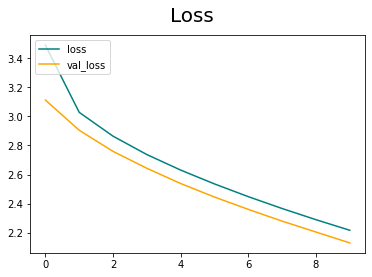

In [193]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

---
### ✔️ Evaluate

---

- 이번에는 작문 모델을 평가하기 위해 작문된 문장을 사람이 평가해본다.<br><br>

In [194]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=14):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [198]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=14)

'<start> i love you , liberian girl <end> '

---
### ✔️ 결론
---

- 이번 Exploration Node는 `텍스트 생성모델`을 만들어보는 과정이다.<br><br> 
- 1) 맨 처음 진행한 작업은 데이터 전처리를 해주었다. `텍스트 생성모델`에서도 텍스트 분류 모델처럼 단어사전을 만들어야 하기 때문에 공백을 기준으로 토큰화를 진행하였다. 토큰화 과정 중 발생할 수 있는 문제를 해결하기 위해 정규표현식(Regex)를 사용하여 필터링하였다. `tf.keras.preprocessing.text.Tokenizer` 패키지를 사용해 정제된 데이터를 토큰화하고, 단어사전을 만들어주는 `벡터화(vectorize)`를 진행하였다. 작사 중 지나치게 긴 문장들이 존재하는데, 이러한 문장들은 다른 데이터들이 과도한 padding을 갖게하므로 제거한다.<br>왜냐하면 너무 긴 문장은 노래 가사를 작사하기에 어울리지 않기 때문이다.<br><br>따라서 **토큰화 했을 때 토큰의 갯수가 15개를 넘어가는 문장은 학습데이터에서 제외**하였다. 학습데이터와 벨리데이션 데이터 분리하였다.<br><br>
- 2) 다음으로 모델학습에서는 1개의 Embedding 레이어, 2개의 LSTM 레이어, 1개의 Dense 레이어로 구성하여 학습을 진행하였다. `embedding_size` = 256, `hidden_size` = 1024 `model.compile` 과정에서 optimizer는 Adam을 사용하였으며, loss는  SparseCategoricalCrossentropy를 사용하여 진행하였다. 학습은 총 10 epoch로 진행하였다. 
`val_loss`는 2.1304로 루브릭 평가기준을 만족하였다.<br><br>
![image](https://user-images.githubusercontent.com/103712369/169141711-30424fb5-c56f-4ac9-9db5-ad5255d6bc48.png)<br>![image](https://user-images.githubusercontent.com/103712369/169141812-152b9772-773a-4475-a643-1c8f24963482.png)<br><br>
- 최종적으로 모델에 i love라는 입력이 주어졌을 때 생성한 문장은 다음과 같았다.<br>
![image](https://user-images.githubusercontent.com/103712369/169141939-6b162d9d-3edd-4a64-a9df-aa7428a730a6.png)
